In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark").getOrCreate()


In [29]:
spark.version

'3.5.5'

In [8]:
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [19]:
strings = spark.read.text("lorem.md")
strings.show(3, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                         

In [21]:
strings.count()

9

In [25]:
filtered = strings.filter(strings.value.contains("eget"))
filtered.count()

3

In [6]:
dfhr = spark.read.csv("emp.csv", header=True, inferSchema=True)
dfhr.show()

+---+-----------+------+-------+------+
| id|       name|dep_id|exp_lvl|salary|
+---+-----------+------+-------+------+
|  1|     'Anna'|     1|    1.0|1000.0|
|  2| 'Krystyna'|     2|    2.0|5000.0|
|  3|      'Jan'|     1|    1.0|1000.0|
|  4|     'John'|     1|    3.0|7000.0|
|  5|     'Paul'|     2|    3.0|8000.0|
|  6|    'Kumar'|     1|    3.0|7000.0|
+---+-----------+------+-------+------+



In [7]:
dfhr.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- dep_id: integer (nullable = true)
 |-- exp_lvl: double (nullable = true)
 |-- salary: double (nullable = true)



In [11]:
dfhr.select("name").show()

+-----------+
|       name|
+-----------+
|     'Anna'|
| 'Krystyna'|
|      'Jan'|
|     'John'|
|     'Paul'|
|    'Kumar'|
+-----------+



In [9]:
dfhr.filter(dfhr["salary"] > 5000).show()

+---+--------+------+-------+------+
| id|    name|dep_id|exp_lvl|salary|
+---+--------+------+-------+------+
|  4|  'John'|     1|    3.0|7000.0|
|  5|  'Paul'|     2|    3.0|8000.0|
|  6| 'Kumar'|     1|    3.0|7000.0|
+---+--------+------+-------+------+



In [8]:
dfhr.filter(dfhr.salary > 5000).show()

+---+--------+------+-------+------+
| id|    name|dep_id|exp_lvl|salary|
+---+--------+------+-------+------+
|  4|  'John'|     1|    3.0|7000.0|
|  5|  'Paul'|     2|    3.0|8000.0|
|  6| 'Kumar'|     1|    3.0|7000.0|
+---+--------+------+-------+------+



In [10]:
dfhr.filter(dfhr.dep_id == 1).show()

+---+--------+------+-------+------+
| id|    name|dep_id|exp_lvl|salary|
+---+--------+------+-------+------+
|  1|  'Anna'|     1|    1.0|1000.0|
|  3|   'Jan'|     1|    1.0|1000.0|
|  4|  'John'|     1|    3.0|7000.0|
|  6| 'Kumar'|     1|    3.0|7000.0|
+---+--------+------+-------+------+



In [12]:
dfhr.filter(dfhr.dep_id == 1).select("name","salary").orderBy("salary", ascending=False).show()

+--------+------+
|    name|salary|
+--------+------+
|  'John'|7000.0|
| 'Kumar'|7000.0|
|  'Anna'|1000.0|
|   'Jan'|1000.0|
+--------+------+



In [23]:
dfdep = spark.read.csv("dep.csv", header=True, inferSchema=True)
dfdep.show()

+---+----+
| id|name|
+---+----+
|  1|  IT|
|  2| FIN|
+---+----+



In [24]:
dfhr.join(dfdep, dfhr.dep_id == dfdep.id,"inner").show()

+---+-----------+------+-------+------+---+----+
| id|       name|dep_id|exp_lvl|salary| id|name|
+---+-----------+------+-------+------+---+----+
|  1|     'Anna'|     1|    1.0|1000.0|  1|  IT|
|  2| 'Krystyna'|     2|    2.0|5000.0|  2| FIN|
|  3|      'Jan'|     1|    1.0|1000.0|  1|  IT|
|  4|     'John'|     1|    3.0|7000.0|  1|  IT|
|  5|     'Paul'|     2|    3.0|8000.0|  2| FIN|
|  6|    'Kumar'|     1|    3.0|7000.0|  1|  IT|
+---+-----------+------+-------+------+---+----+



In [15]:
dfhr.printSchema()
dfdep.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- dep_id: integer (nullable = true)
 |-- exp_lvl: double (nullable = true)
 |-- salary: double (nullable = true)

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)



In [21]:
from pyspark.sql.functions import avg

dfhr.groupBy("dep_id").agg(avg("salary")).show()

+------+-----------+
|dep_id|avg(salary)|
+------+-----------+
|     1|     4000.0|
|     2|     6500.0|
+------+-----------+



In [29]:
from pyspark.sql.functions import concat_ws

dfhr.select(concat_ws(" ", dfhr.name, dfhr.salary).alias("label")).show()

+------------------+
|             label|
+------------------+
|     'Anna' 1000.0|
| 'Krystyna' 5000.0|
|      'Jan' 1000.0|
|     'John' 7000.0|
|     'Paul' 8000.0|
|    'Kumar' 7000.0|
+------------------+



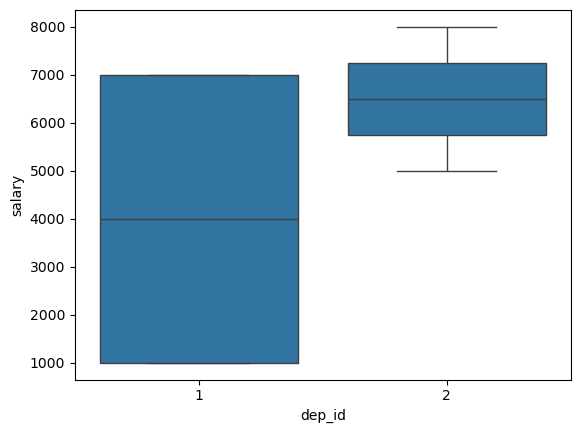

In [33]:
pdf = dfhr.select("salary","dep_id").toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="dep_id", y="salary", data=pdf)
plt.show()